In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [63]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from scipy.cluster import hierarchy
from scipy.spatial import distance

# Ex. 7

In [35]:
dataset_file = '../datasets/USArrests.csv'
seed = 1

data = pd.read_csv(dataset_file, index_col='State')

In [36]:
dist = distance.pdist(data) ** 2
corr = distance.squareform(1 - np.corrcoef(data).round(4))

In [37]:
diff = dist / dist.std() - corr / corr.std()

0.22931110024352708

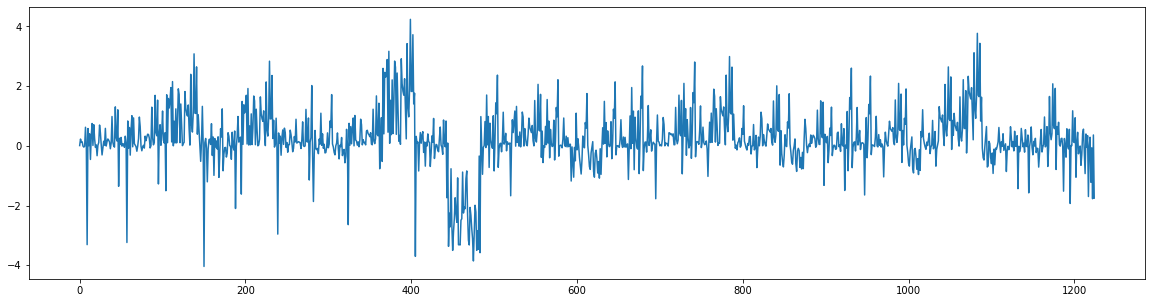

In [38]:
plt.figure(figsize=[20, 5])
plt.plot(np.arange(diff.size), diff)
diff.mean()

Plot shows that difference of standardized `distance`s and `1 - correlation`s has mean close to 0. 

# Ex. 8

In [39]:
pca = PCA().fit(data)
loadings = pd.DataFrame(pca.components_.T, index=data.columns, columns=['PC1', 'PC2', 'PC3', 'PC4'])

In [43]:
pca.explained_variance_ratio_

array([9.65534221e-01, 2.78173366e-02, 5.79953492e-03, 8.48907879e-04])

In [42]:
scores = pca.transform(data)
var = scores.std(axis=0) ** 2
pve = var / var.sum()
pve

array([9.65534221e-01, 2.78173366e-02, 5.79953492e-03, 8.48907879e-04])

# Ex. 9

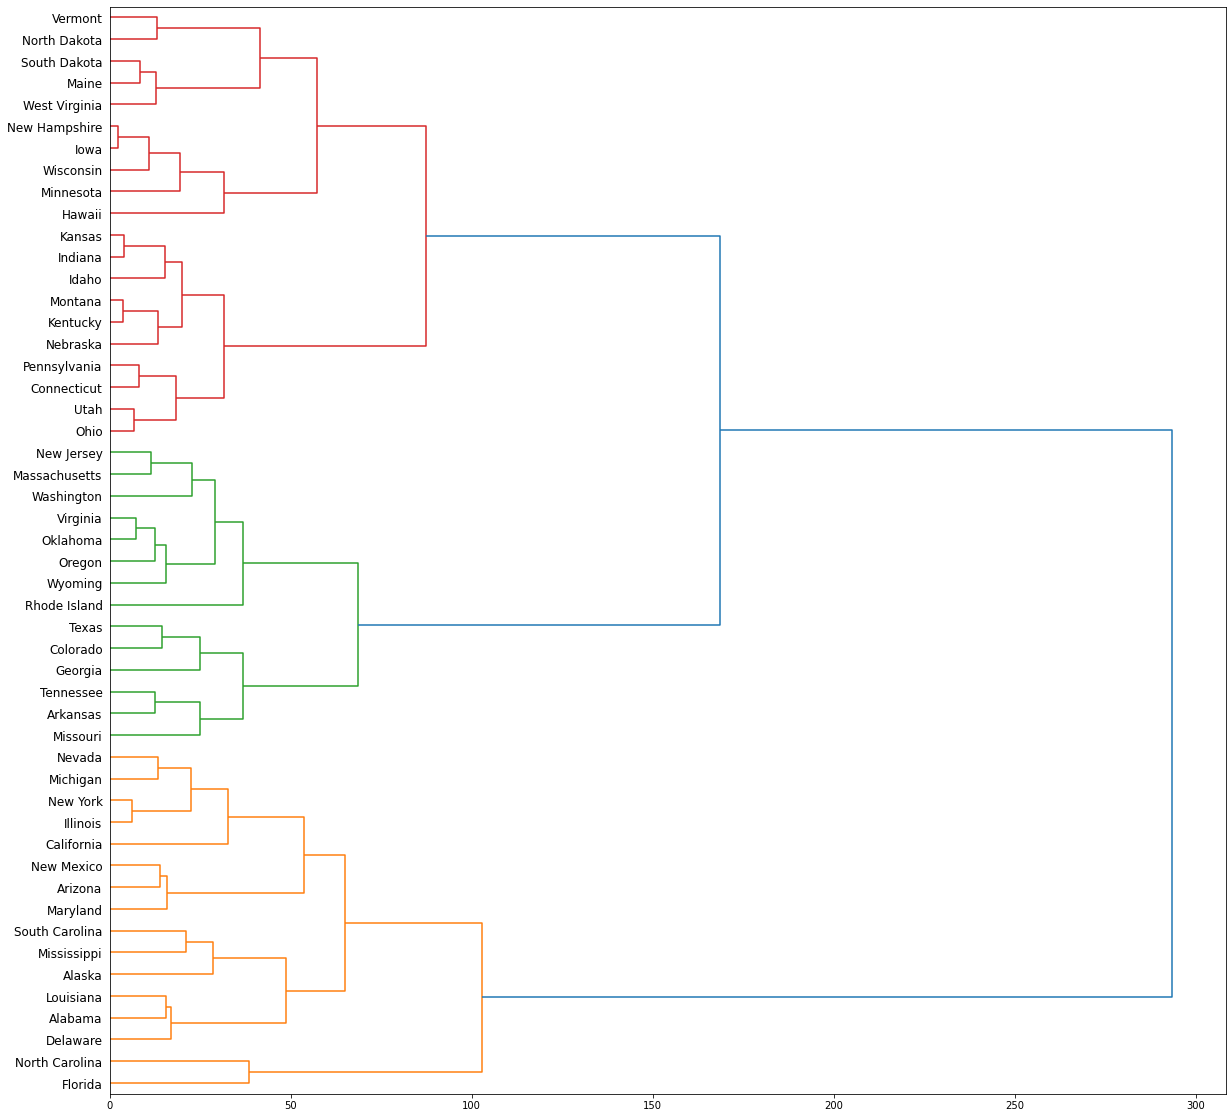

In [55]:
plt.figure(figsize=[20,20])
Z = hierarchy.linkage(data, 'complete')
dendrogram_dict = hierarchy.dendrogram(Z, labels=data.index, orientation='right', color_threshold=150, leaf_font_size=12)

In [79]:
clusters = pd.Series(hierarchy.fcluster(Z, 150, criterion='distance'), index=data.index)
for cluster in clusters.unique():
    print(cluster, *clusters.loc[(clusters == cluster)].index.to_list())

1 Alabama Alaska Arizona California Delaware Florida Illinois Louisiana Maryland Michigan Mississippi Nevada New Mexico New York North Carolina South Carolina
2 Arkansas Colorado Georgia Massachusetts Missouri New Jersey Oklahoma Oregon Rhode Island Tennessee Texas Virginia Washington Wyoming
3 Connecticut Hawaii Idaho Indiana Iowa Kansas Kentucky Maine Minnesota Montana Nebraska New Hampshire North Dakota Ohio Pennsylvania South Dakota Utah Vermont West Virginia Wisconsin


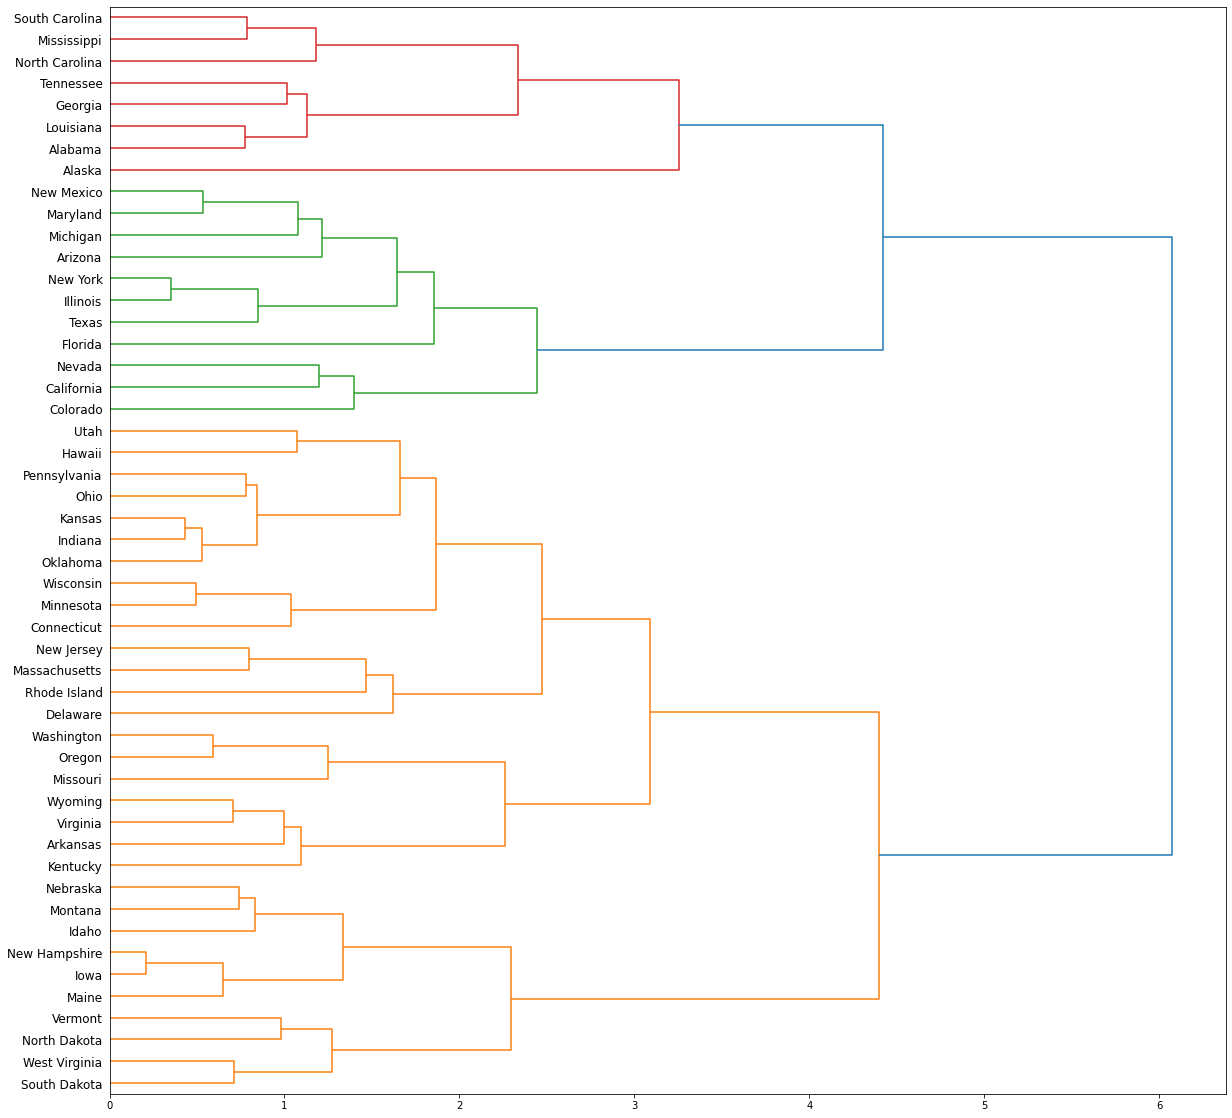

In [91]:
scaled_data = data / data.std()

plt.figure(figsize=[20,20])
Z = hierarchy.linkage(scaled_data, 'complete')
dendrogram_dict = hierarchy.dendrogram(Z, labels=data.index, orientation='right', color_threshold=4.42, leaf_font_size=12)

In [92]:
clusters = pd.Series(hierarchy.fcluster(Z, 4.42, criterion='distance'), index=scaled_data.index)
for cluster in clusters.unique():
    print(cluster, *clusters.loc[(clusters == cluster)].index.to_list())

3 Alabama Alaska Georgia Louisiana Mississippi North Carolina South Carolina Tennessee
2 Arizona California Colorado Florida Illinois Maryland Michigan Nevada New Mexico New York Texas
1 Arkansas Connecticut Delaware Hawaii Idaho Indiana Iowa Kansas Kentucky Maine Massachusetts Minnesota Missouri Montana Nebraska New Hampshire New Jersey North Dakota Ohio Oklahoma Oregon Pennsylvania Rhode Island South Dakota Utah Vermont Virginia Washington West Virginia Wisconsin Wyoming


Standartization of data had a lot of impact on the results obtained. Distances became smaller, resulting clusters had changed and the whole dendrogram looks different. In such a case scaling is important, because variables have different units.

# Ex. 10

In [133]:
seed = 1
class_1 = np.random.normal(loc=0, size=1000).reshape(20, 50)
class_2 = np.random.normal(loc=1, size=1000).reshape(20, 50)
class_3 = np.random.normal(loc=-.5, size=1000).reshape(20, 50)
X = np.vstack((class_1, class_2, class_3))
classes = np.concatenate([np.full(20, 0), np.full(20, 1), np.full(20, 2)])

In [134]:
pca = PCA().fit(X)
scores = pca.transform(X)
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.components_.shape[0])])

Text(0, 0.5, 'PC2')

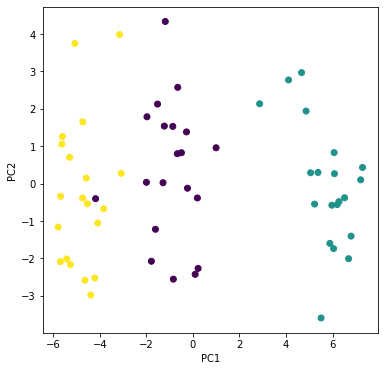

In [135]:
plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 1], c=classes)
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

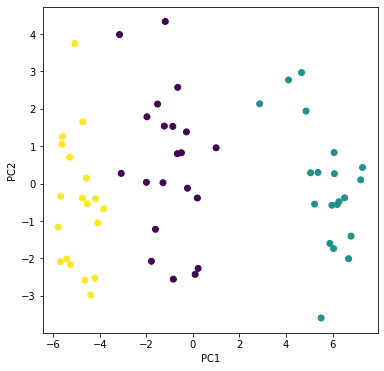

In [139]:
km = KMeans(n_clusters=3, n_init=20, init='random', random_state=seed)
clusters = km.fit_predict(X)

plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 1], c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [153]:
mx = pd.DataFrame({'cluster': clusters, 'class': classes})
print(mx.loc[mx['class'] == 0].cluster.value_counts().max())
print(mx.loc[mx['class'] == 1].cluster.value_counts().max())
print(mx.loc[mx['class'] == 2].cluster.value_counts().max())

19
20
18


3 missmatches.

Text(0, 0.5, 'PC2')

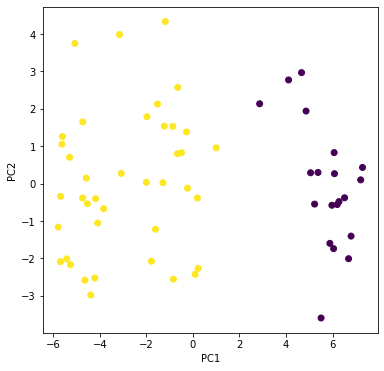

In [167]:
km = KMeans(n_clusters=2, n_init=20, init='random', random_state=seed)
clusters = km.fit_predict(X)

plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 1], c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')

As expected, 2 near clusters merged.

Text(0, 0.5, 'PC3')

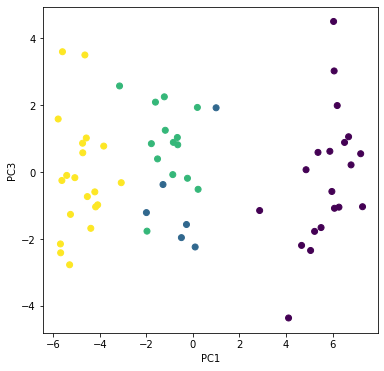

In [168]:
km = KMeans(n_clusters=4, n_init=20, init='random', random_state=seed)
clusters = km.fit_predict(X)

plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 2], c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC3')

Centeral (in PC1 vs PC2 coords) cluster splited up in two.

Text(0, 0.5, 'PC2')

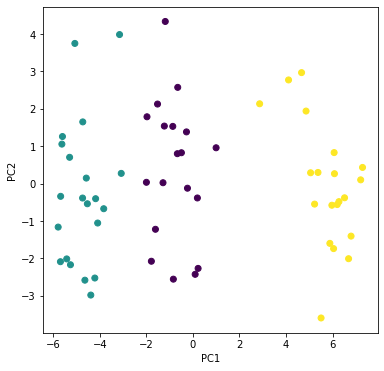

In [169]:
km = KMeans(n_clusters=3, n_init=20, init='random', random_state=seed)
clusters = km.fit_predict(scores[:, :1])

plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 1], c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [170]:
mx = pd.DataFrame({'cluster': clusters, 'class': classes})
print(mx.loc[mx['class'] == 0].cluster.value_counts().max())
print(mx.loc[mx['class'] == 1].cluster.value_counts().max())
print(mx.loc[mx['class'] == 2].cluster.value_counts().max())

19
20
20


And again, almost perfect split.

Text(0, 0.5, 'PC2')

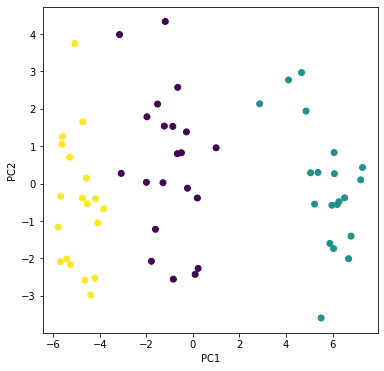

In [171]:
km = KMeans(n_clusters=3, n_init=20, init='random', random_state=seed)
clusters = km.fit_predict(X / X.std())

plt.figure(figsize=[6, 6])
plt.scatter(scores[:, 0], scores[:, 1], c=clusters)
plt.xlabel('PC1')
plt.ylabel('PC2')

In [172]:
mx = pd.DataFrame({'cluster': clusters, 'class': classes})
print(mx.loc[mx['class'] == 0].cluster.value_counts().max())
print(mx.loc[mx['class'] == 1].cluster.value_counts().max())
print(mx.loc[mx['class'] == 2].cluster.value_counts().max())

19
20
18


Results did not changed a lot, because standard deviation of original data is close to 1.

# Ex. 11

In [231]:
dataset_file = '../datasets/Ch10Ex11.csv'

data = pd.read_csv(dataset_file, header=None).transpose()
classes = pd.Series(data.index.values > 19, index=data.index, dtype=int)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.961933,-0.292526,0.258788,-1.152132,0.195783,0.030124,0.085418,1.116610,-1.218857,1.267369,...,1.325041,-0.116171,-1.470146,-0.379272,-1.465006,1.075148,-1.226125,-3.056328,1.450658,0.717977
1,0.441803,-1.139267,-0.972845,-2.213168,0.593306,-0.691014,-1.113054,1.341700,-1.277279,-0.918349,...,0.740838,-0.162392,-0.633375,-0.895521,2.034465,3.003267,-0.501702,0.449889,1.310348,0.763482
2,-0.975005,0.195837,0.588486,-0.861525,0.282992,-0.403426,-0.677969,0.103278,-0.558925,-1.253500,...,-0.435533,-0.235912,1.446660,-1.127459,0.440849,-0.123441,-0.717430,1.880362,0.383837,0.313576
3,1.417504,-1.281121,-0.800258,0.630925,0.247147,-0.729859,-0.562929,0.390963,-1.344493,-1.067114,...,-3.065529,1.597294,0.737478,-0.631248,-0.530442,-1.036740,-0.169113,-0.742841,-0.408860,-0.326473
4,0.818815,-0.251439,-1.820398,0.951772,1.978668,-0.364099,0.938194,-1.927491,1.159115,-0.240638,...,-2.378938,-0.086946,-0.122342,1.418029,1.075337,-1.270604,0.599530,2.238346,-0.471111,-0.158700


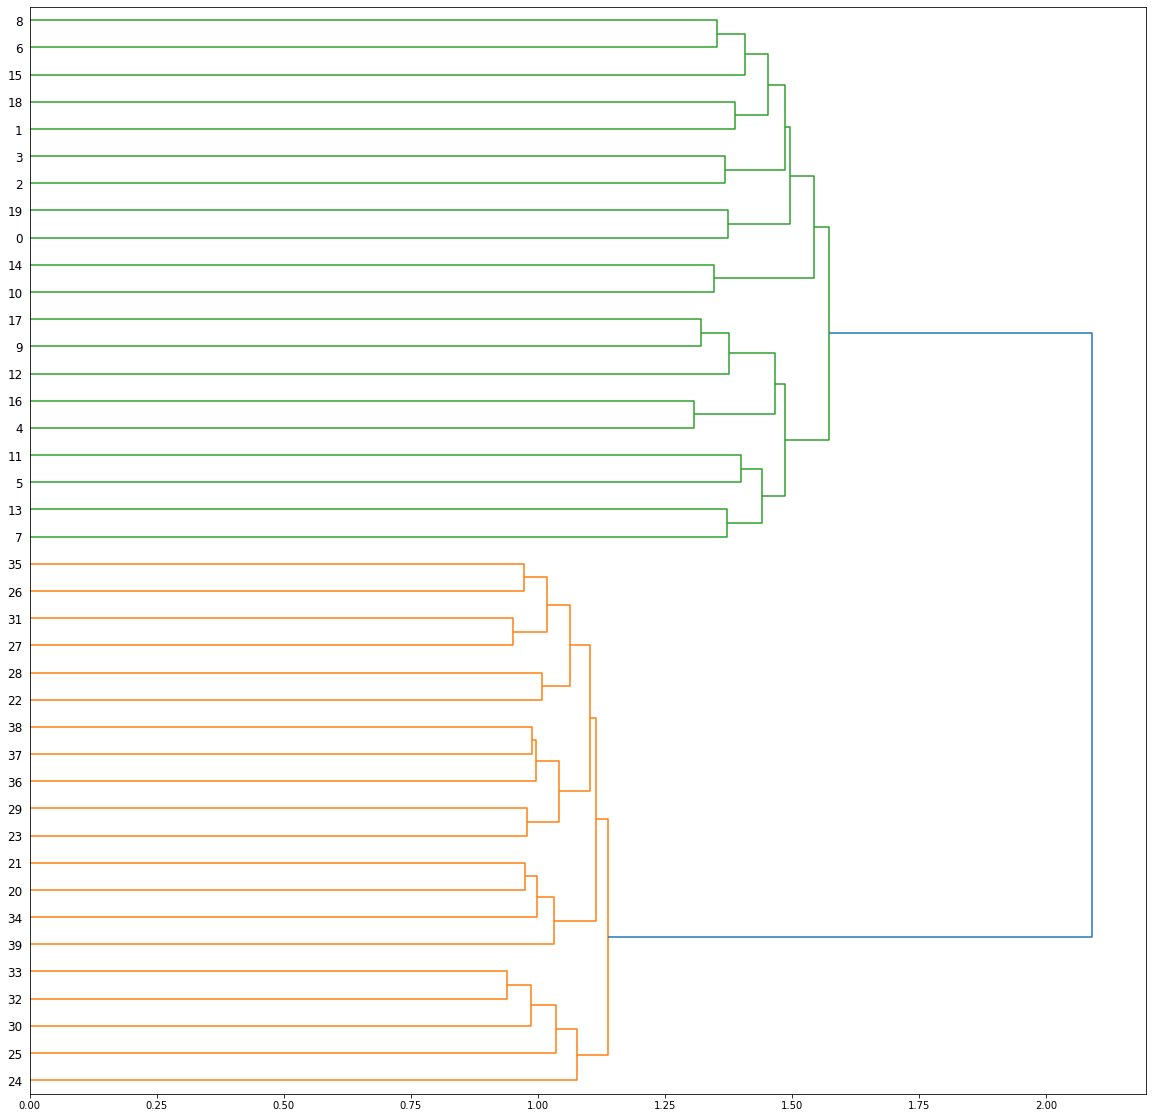

In [185]:
plt.figure(figsize=[20,20])
corr = np.corrcoef(data)
Z = hierarchy.linkage(corr, 'complete')
dendrogram_dict = hierarchy.dendrogram(Z, labels=data.index, orientation='right', color_threshold=2, leaf_font_size=12)

In [189]:
clusters = pd.Series(hierarchy.fcluster(Z, 2, criterion='distance'), index=data.index)
for cluster in clusters.unique():
    print(cluster, *clusters.loc[(clusters == cluster)].index.to_list())

2 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
1 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39


Clustering result in a perfect split.

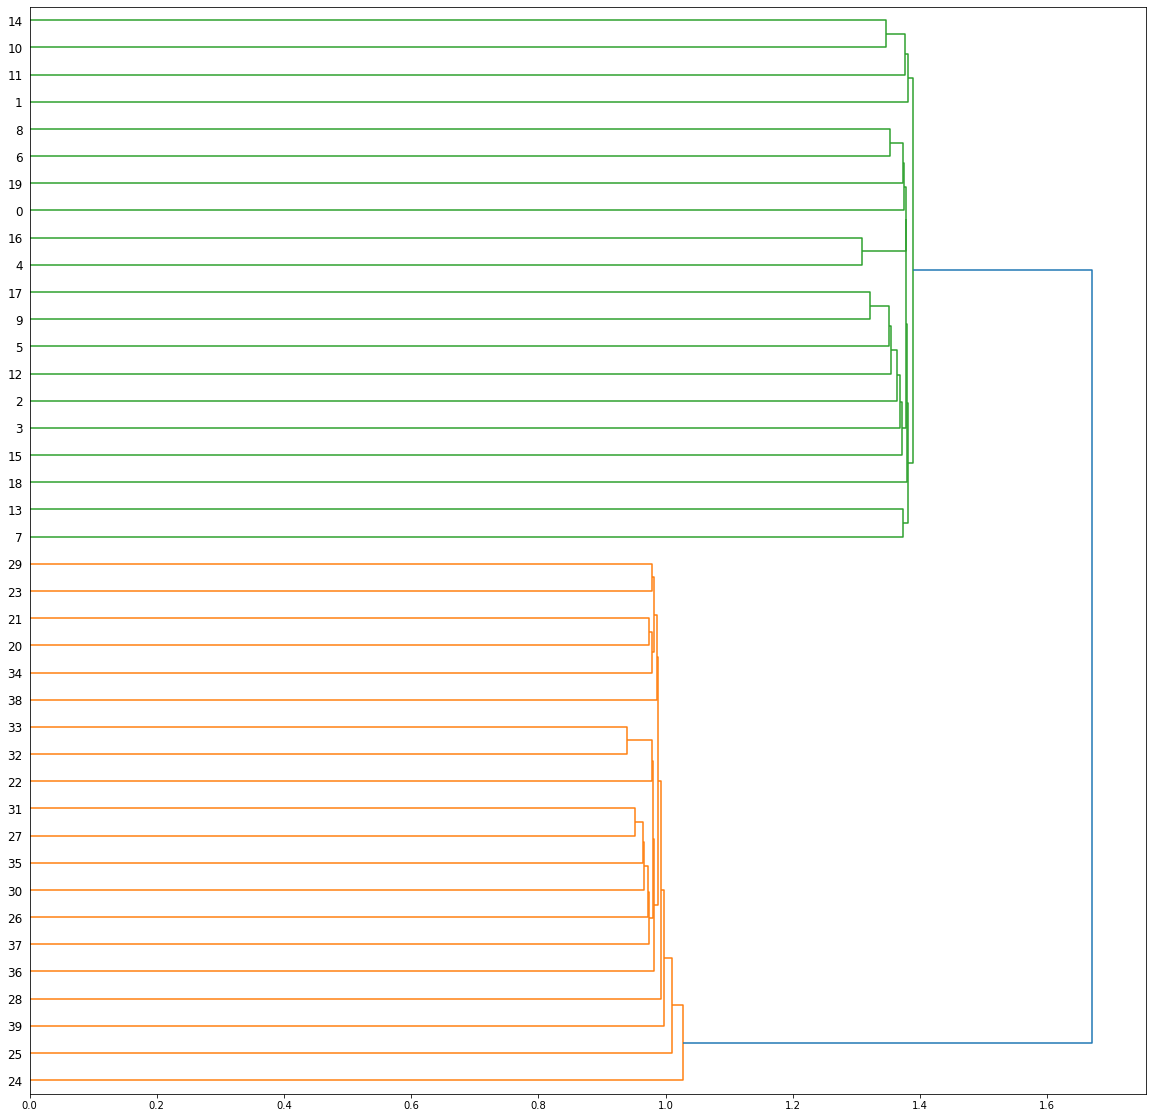

In [191]:
plt.figure(figsize=[20,20])
Z = hierarchy.linkage(corr, 'single')
dendrogram_dict = hierarchy.dendrogram(Z, labels=data.index, orientation='right', color_threshold=1.5, leaf_font_size=12)

In [193]:
clusters = pd.Series(hierarchy.fcluster(Z, 1.5, criterion='distance'), index=data.index)
for cluster in clusters.unique():
    print(cluster, *clusters.loc[(clusters == cluster)].index.to_list())

2 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
1 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39


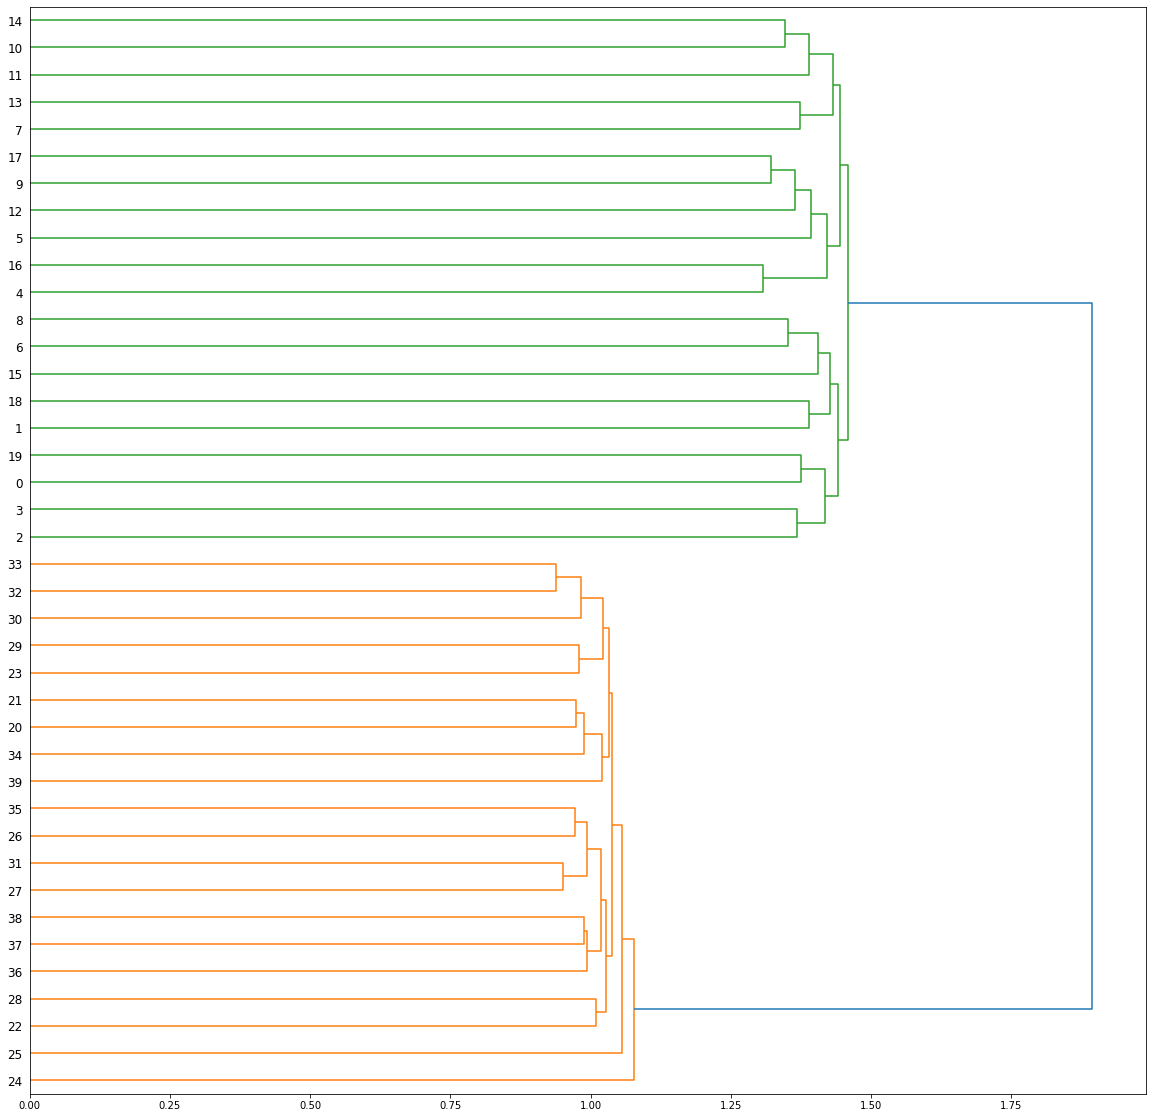

In [194]:
plt.figure(figsize=[20,20])
Z = hierarchy.linkage(corr, 'average')
dendrogram_dict = hierarchy.dendrogram(Z, labels=data.index, orientation='right', color_threshold=1.5, leaf_font_size=12)

In [195]:
clusters = pd.Series(hierarchy.fcluster(Z, 1.5, criterion='distance'), index=data.index)
for cluster in clusters.unique():
    print(cluster, *clusters.loc[(clusters == cluster)].index.to_list())

2 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
1 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39


Choose of linkage only impact on height of dendrogram, which probably can be solved by scaling the original data.

Simplest way to see most varying genes is simply look at their variances (or standard deviations).

A simple way of selecting most varying genes is performing PCA and looking at loadings.

In [232]:
pca = PCA().fit(data)
np.abs(pca.components_).sum(axis=0).argsort()[:-10:-1]

array([913, 581, 548, 290, 523, 324, 745, 590, 586])